# Phase 4 Code Challenge Review

# Load Pakages

In [1]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\bobev\anaconda3\envs\tfgpu\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [4]:
pip list

Package                  Version
------------------------ --------
absl-py                  1.4.0
aiofiles                 22.1.0
aiohttp                  3.8.3
aiosignal                1.2.0
aiosqlite                0.18.0
anyio                    3.5.0
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
asttokens                2.0.5
astunparse               1.6.3
async-timeout            4.0.2
attrs                    22.1.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   4.1.0
blinker                  1.4
Bottleneck               1.3.5
brotlipy                 0.7.0
cachetools               4.2.2
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       2.0.4
click                    8.0.4
colorama                 0.4.6
comm                     0.1.2
contourpy                1.0.5
cryptography             39.0.1
cycler                  

In [5]:
# pip cache purge

In [6]:
# Basic Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import string
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [7]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [9]:
# Step 1: Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Step 2: Stopword Removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Step 3: Lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Step 4: Remove odd special characters via RegExr
def clean_tokens(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

# Apply preprocessing steps to the 'tweet' column
df['tweet_text'] = df['tweet_text'].astype(str)
df['tokenized_tweet'] = df['tweet_text'].apply(clean_tokens)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(tokenize_text)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(lemmatize_tokens)

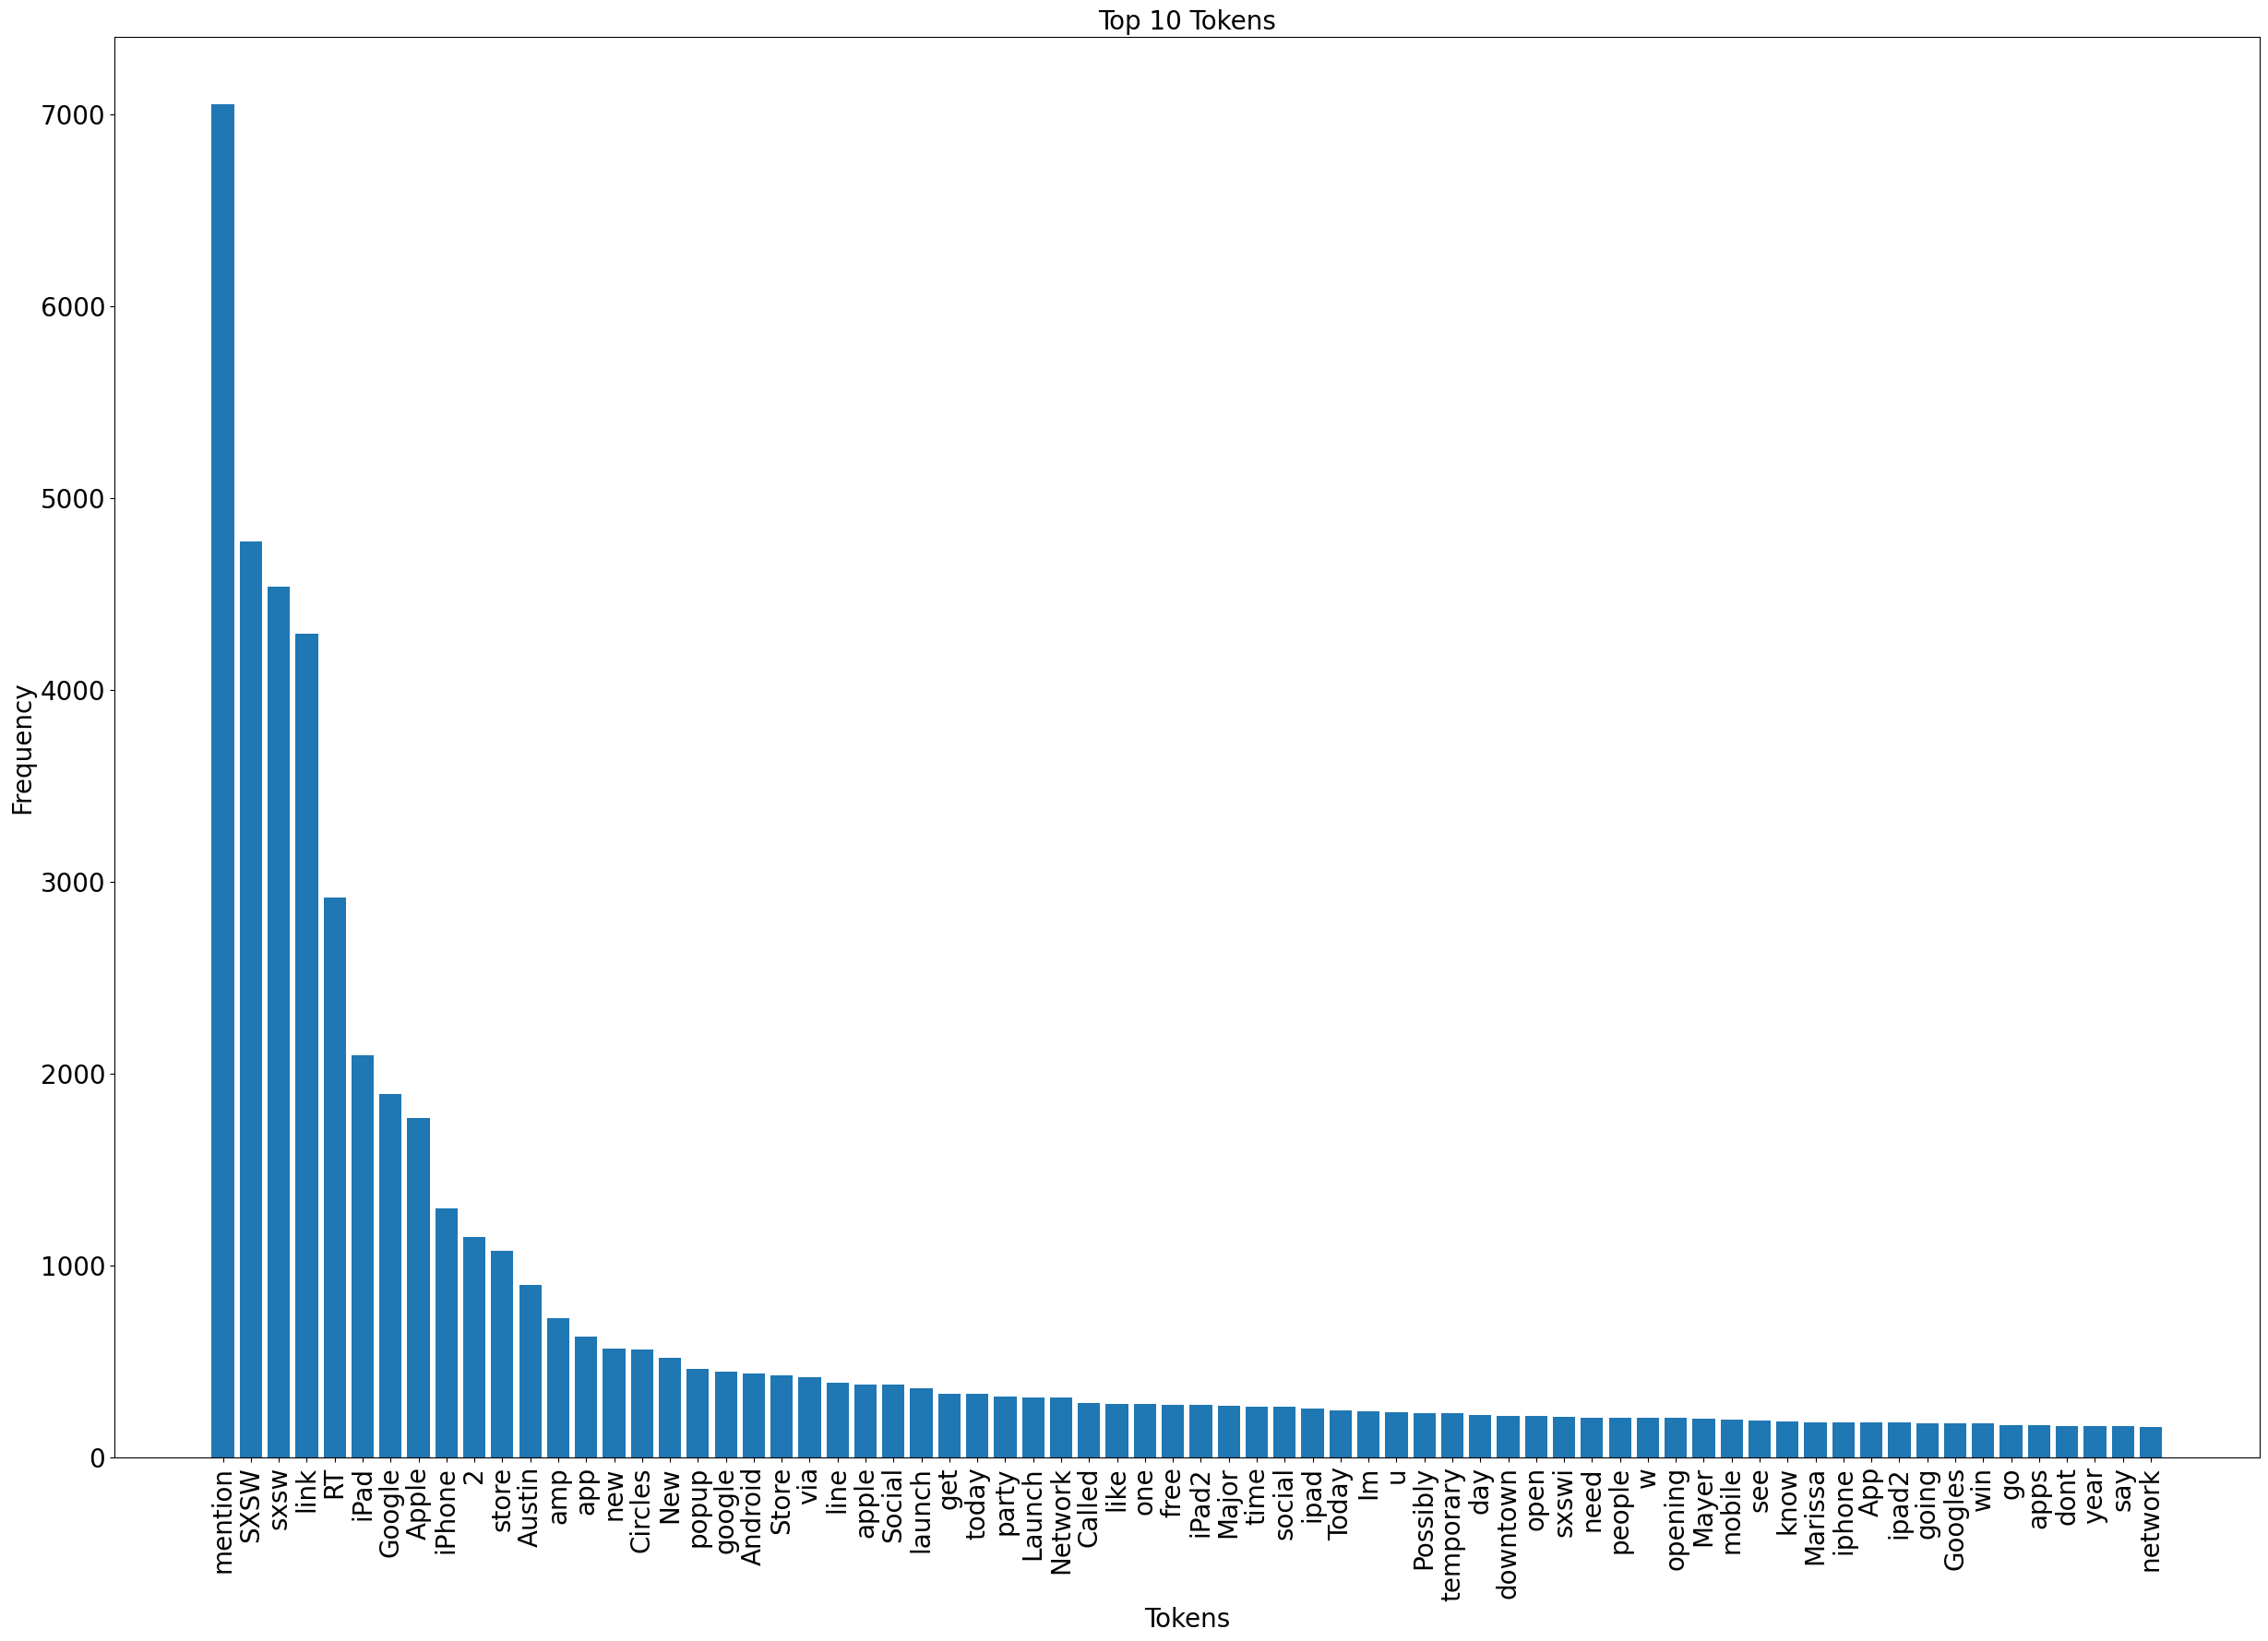

In [10]:
all_tokens = [token for tokens in df['tokenized_tweet'] for token in tokens]
freq_dist = FreqDist(all_tokens)

# Get the top 10 most common tokens
top_tokens = freq_dist.most_common(70)

# Extract the tokens and frequencies
tokens = [token for token, _ in top_tokens]
frequencies = [freq for _, freq in top_tokens]

# Create a bar chart
plt.figure(figsize=(30, 20))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Top 10 Tokens', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [11]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [12]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Create a simple TensorFlow computation graph
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.add(a, b)

# Execute the computation graph
result = c.numpy()

# Print the result
print("Result:", result)

TensorFlow version: 2.10.0
Result: 7.0


In [13]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [14]:
# Check if GPU is available
print("GPU Available:", tf.test.is_gpu_available())

# Check the list of visible GPUs
print("Visible GPUs:", tf.config.list_physical_devices("GPU"))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: False
Visible GPUs: []


In [15]:
import tensorflow as tf

# Check the list of visible GPUs
print("Visible GPUs:", tf.config.list_physical_devices("GPU"))

Visible GPUs: []


In [16]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [17]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  print('GPU is available')

In [19]:
gpus

[]

# 3) Natural Language Processing

## NLP Concepts

### Some Example Text

In [ ]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 1: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)



#### Answer:

- Lowercase (standardize case)
- Remove stopwords (really common words that likely have no semantic value)
- Stem or lemmatize to remove prefixes/suffixes/grammer bits
- Remove punctuation
- Tokenize

### 2: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Columns: every word/token in the dataset/corpus
- Rows: the documents you're vectorizing


### 3: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- TF-IDF: term frequency inverse document frequency
- TF-IDF is a vectorizer that takes into account the rarity of the words


- TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that is used to evaluate the importance of a term in a document within a collection or corpus of documents.

- TF (Term Frequency) measures the frequency of a term within a document. It calculates the ratio of the number of times a term appears in a document to the total number of terms in that document. The intuition behind TF is that terms that appear more frequently in a document are more important to that document.

- IDF (Inverse Document Frequency) measures the rarity or uniqueness of a term across the entire corpus. It calculates the logarithm of the inverse ratio of the total number of documents in the corpus to the number of documents that contain the term. The intuition behind IDF is that terms that appear in a fewer number of documents are more informative and carry more weight in distinguishing between documents.

- TF-IDF is calculated by multiplying the TF and IDF values for each term in a document. The higher the TF-IDF score for a term in a document, the more important and relevant that term is to the document.

- TF-IDF is commonly used in natural language processing tasks, such as text classification, information retrieval, and text mining. It helps in identifying the most significant words or terms in a document and can be used to represent documents as numerical feature vectors for machine learning algorithms.


## NLP in Code

### Set Up

In [ ]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [ ]:
policies.head()

The documents for activity are in the `policy` column, and the target is candidate. 

### 4: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [ ]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [ ]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instantiate it
vectorizer = CountVectorizer()

In [ ]:
# Fit it
vectorizer.fit(X_train)

### 5: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to transform train and test sets with the vectorizer
X_tr_vec = vectorizer.transform(X_train)
X_te_vec = vectorizer.transform(X_test)

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_tr_vec, y_train)

In [ ]:
# Code here to evaluate your model on the test set
rfc.score(X_te_vec, y_test)

# 4) Clustering

## Clustering Concepts

### 1: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- You set the number of cluster centers (K) - algorithm randomly starts with that number of cluster centers (in random spots!)
- The algorithm calculates the distance between the centers and each observation and assigns the observation to the closest cluster center to create the first iteration of clusters
- The algorithm then takes all the observations assigned to each cluster, and moves that cluster center to be at the exact actual center (mean) of the newly created cluster
- Repeat! Until the cluster centers stop moving (or tolerance is met - some parameters in the implementation)

### 2: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia measures the distance between each point and its center - the idea is that better clusters are more tightly concentrated
- KMeans tries to minimize inertia when choosing cluster centers
- Method to evaluate - elbow plot! 

### 3: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette score
- Difference between silhouette score and inertia: silhouette score tries to maximize similarity within groups and maximize distances between clusters, while inertia just looks within each cluster

## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.

### Set Up

In [ ]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 4: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale

In [ ]:
# call_on_students(1)

In [ ]:
# Code to preprocess the data
k_scaler = StandardScaler()

# Name the processed data X_processed
X_processed = k_scaler.fit_transform(X)

### 5: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [ ]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Instantiate
cluster = AgglomerativeClustering(n_clusters=2)
# Fit the object
cluster.fit(X_processed)

# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

### 6: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [ ]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Create the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    cluster.fit(data)

    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)